<a href="https://colab.research.google.com/github/iamnileshmehta/Deep-Learning-Projects/blob/main/Deep_Learning_Traffic_signal_classification_using_CNN_and_Tenserflow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import random


In [ ]:
! wget https://www.dropbox.com/s/n2wzd6k7t9u6yyx/valid.p

--2023-11-16 17:32:40--  https://www.dropbox.com/s/n2wzd6k7t9u6yyx/valid.p
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/n2wzd6k7t9u6yyx/valid.p [following]
--2023-11-16 17:32:40--  https://www.dropbox.com/s/raw/n2wzd6k7t9u6yyx/valid.p
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc565ab57b18d04eef93c7681bf6.dl.dropboxusercontent.com/cd/0/inline/CHqZOggNs0RYYMzymKRMXZS2Zn6jMAfeITEPZi-uN4ePCl0rMMZmIkVITKqEDzgVYV1SSuw2stLY49oX3OPivgRuhxZ9XjZWLcaAj2-6m9WSKtOE7fxVqzkFdKjKtExkFcbwNd183_NOqPCyNWPPTS-M/file# [following]
--2023-11-16 17:32:41--  https://uc565ab57b18d04eef93c7681bf6.dl.dropboxusercontent.com/cd/0/inline/CHqZOggNs0RYYMzymKRMXZS2Zn6jMAfeITEPZi-uN4ePCl0rMMZmIkVITKqEDzgVYV1SSuw2stLY49oX3OPivgRuhxZ9XjZWLcaAj2-6m9WSKtOE7fxV

In [ ]:
! wget https://www.dropbox.com/s/5qxezu9azevja57/train.p

--2023-11-16 17:32:44--  https://www.dropbox.com/s/5qxezu9azevja57/train.p
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/5qxezu9azevja57/train.p [following]
--2023-11-16 17:32:44--  https://www.dropbox.com/s/raw/5qxezu9azevja57/train.p
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5eb2cfdf71b7630e4b2595ec03.dl.dropboxusercontent.com/cd/0/inline/CHpq8_nFzhx9IH2tv3T4KTrG3d1A4j8GTdWQi34UxUsX36OUIG0ArAk38TgdiNmgvUVSIpbdXmjWKcjH26GcOL61qEjtAI7xCKLMGVxuJy8W8Sfz76T99tgnFVz8BmCSHGzoH4LiIpIsiV_ydAxJfbSI/file# [following]
--2023-11-16 17:32:45--  https://uc5eb2cfdf71b7630e4b2595ec03.dl.dropboxusercontent.com/cd/0/inline/CHpq8_nFzhx9IH2tv3T4KTrG3d1A4j8GTdWQi34UxUsX36OUIG0ArAk38TgdiNmgvUVSIpbdXmjWKcjH26GcOL61qEjtAI7xCKLMGVxuJy8W8Sfz76T9

In [ ]:
! wget https://www.dropbox.com/s/zi7honh03yr85ns/test.p

--2023-11-16 17:32:48--  https://www.dropbox.com/s/zi7honh03yr85ns/test.p
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/zi7honh03yr85ns/test.p [following]
--2023-11-16 17:32:48--  https://www.dropbox.com/s/raw/zi7honh03yr85ns/test.p
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd7299fa07e2a1e6e245fb8cf91.dl.dropboxusercontent.com/cd/0/inline/CHq-RVcuwPcmPovkBciVzavjEOb_Vvbtrv95aSg2ZLwrlZiDEomzTp6vVpx3sU65dQ03ixo8yUqqgjFG1EaqrZ1lXGGdNYh7AD25lxwyj3f_9wnMyRtDfBI0YH0OSRu3DvLk5ABJIAouCYuVtRn6HRQz/file# [following]
--2023-11-16 17:32:48--  https://ucd7299fa07e2a1e6e245fb8cf91.dl.dropboxusercontent.com/cd/0/inline/CHq-RVcuwPcmPovkBciVzavjEOb_Vvbtrv95aSg2ZLwrlZiDEomzTp6vVpx3sU65dQ03ixo8yUqqgjFG1EaqrZ1lXGGdNYh7AD25lxwyj3f_9wnMyRtDfBI

In [ ]:
train = pickle.load(open('/content/train.p', 'rb'))
test = pickle.load(open('/content/test.p', 'rb'))
valid = pickle.load(open('/content/valid.p', 'rb'))

In [ ]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']


In [ ]:
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
print(y_train.shape)
print(y_validation.shape)
print(y_test.shape)

(34799,)
(4410,)
(12630,)


4

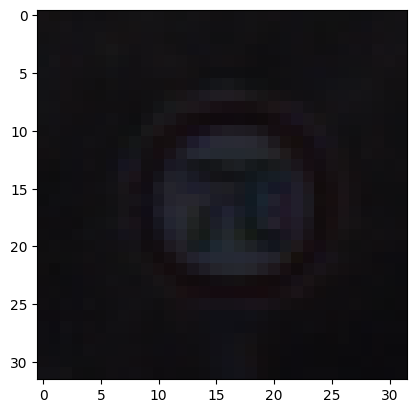

In [ ]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

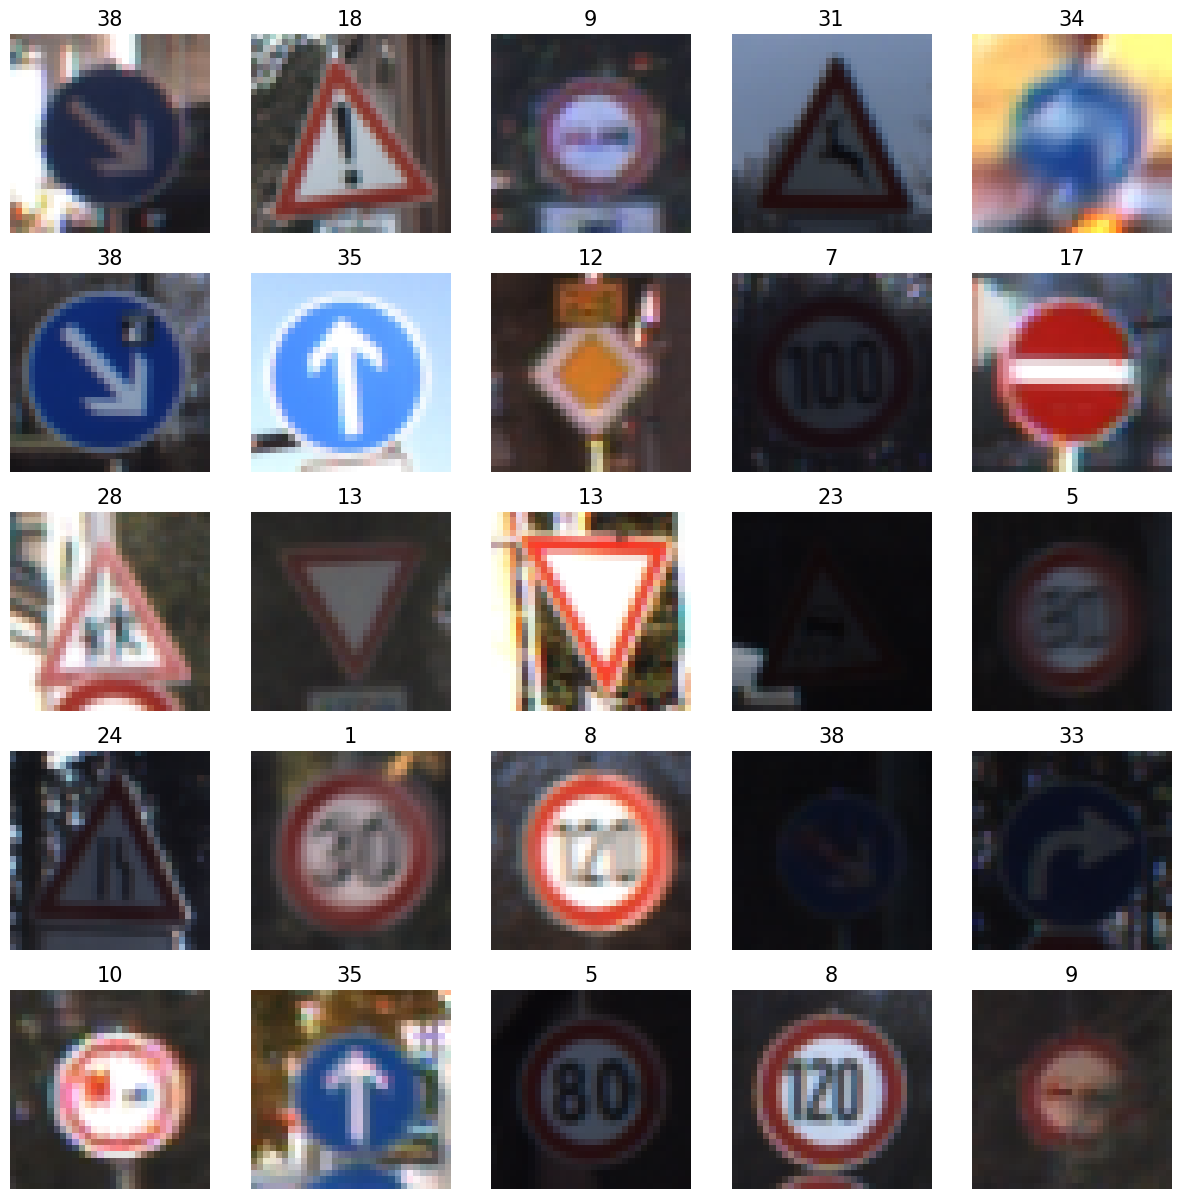

In [ ]:
w_grid = 5
l_grid = 5

fig, axes = plt.subplots(l_grid, w_grid, figsize = (15,15))
axes = axes.ravel()
n_training = len(x_train)

for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index], fontsize=15)
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.2)
plt.show()

In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
x_train_grey = np.sum(x_train/3, axis=3, keepdims=True)
x_test_grey = np.sum(x_test/3, axis=3, keepdims=True)
x_validation_grey = np.sum(x_validation/3, axis=3, keepdims=True)

print(x_train_grey.shape)
print(x_test_grey.shape)
print(x_validation_grey.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [ ]:
x_train_norm = (x_train_grey-255)/255
x_test_norm = (x_test_grey-255)/255
x_validation_norm = (x_validation-255)/255

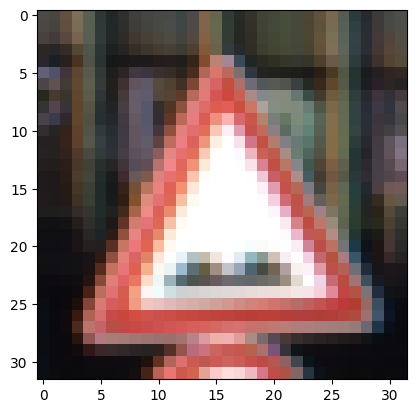

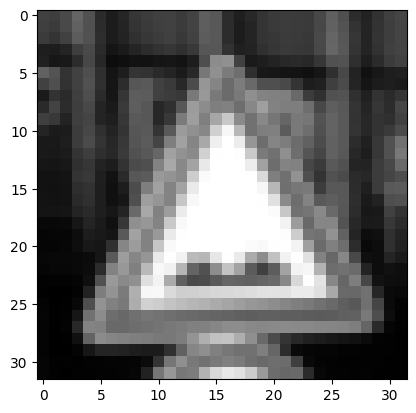

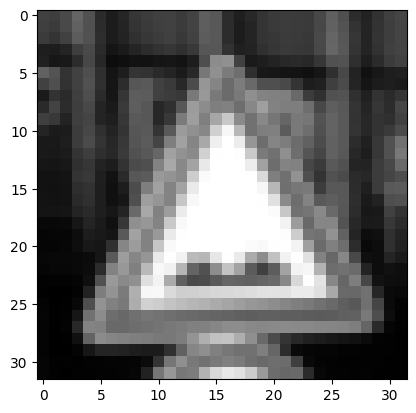

In [ ]:
i = random.randint(1, len(x_train_grey))

plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_grey[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train_norm[i].squeeze(), cmap='gray')

In [ ]:
from tensorflow.keras import datasets, layers, models

model= models.Sequential()
model.add(layers.Conv2D(6, (5,5),activation='relu', input_shape= (32,32,1))) # 6 neurons for 5*5 filter, relu is used to remove negative values
model.add(layers.MaxPooling2D()) # it helps to reduce the size of data
model.add(layers.Dropout(0.2)) # to deactivate 20% neurons to prevent the overfitting
model.add(layers.Conv2D(16, (5,5), activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten()) # convert the multidimensional data to 1D array
model.add(layers.Dense(120, activation= 'relu')) # input layers with 120 neurons
model.add(layers.Dense(84, activation= 'relu')) # hidden layers with 84 neurons
model.add(layers.Dense(43, activation='softmax')) # output layers with 43 neurons


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)              

In [ ]:
model.compile(optimizer = 'Adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = 'accuracy')

In [ ]:
history = model.fit(
    x_train_norm, y_train, batch_size = 500, epochs=15, verbose = 1, validation_data = (x_validation_norm, y_validation)
)

Epoch 1/15
70/70 [==============================] - 23s 317ms/step - loss: 3.4239 - accuracy: 0.0987 - val_loss: 3.2568 - val_accuracy: 0.1698
Epoch 2/15
70/70 [==============================] - 22s 317ms/step - loss: 2.4263 - accuracy: 0.3600 - val_loss: 1.8502 - val_accuracy: 0.4660
Epoch 3/15
70/70 [==============================] - 20s 285ms/step - loss: 1.4030 - accuracy: 0.6031 - val_loss: 1.2631 - val_accuracy: 0.6510
Epoch 4/15
70/70 [==============================] - 22s 310ms/step - loss: 1.0021 - accuracy: 0.7177 - val_loss: 0.9840 - val_accuracy: 0.7256
Epoch 5/15
70/70 [==============================] - 22s 315ms/step - loss: 0.7950 - accuracy: 0.7798 - val_loss: 0.7920 - val_accuracy: 0.7805
Epoch 6/15
70/70 [==============================] - 20s 289ms/step - loss: 0.6534 - accuracy: 0.8205 - val_loss: 0.7105 - val_accuracy: 0.8088
Epoch 7/15
70/70 [==============================] - 22s 312ms/step - loss: 0.5514 - accuracy: 0.8503 - val_loss: 0.6142 - val_accuracy: 0.8297

In [ ]:
score = model.evaluate(x_test_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 4s 11ms/step - loss: 0.6490 - accuracy: 0.8766
Test Accuracy: 0.8765637278556824


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training vs Validation loss')

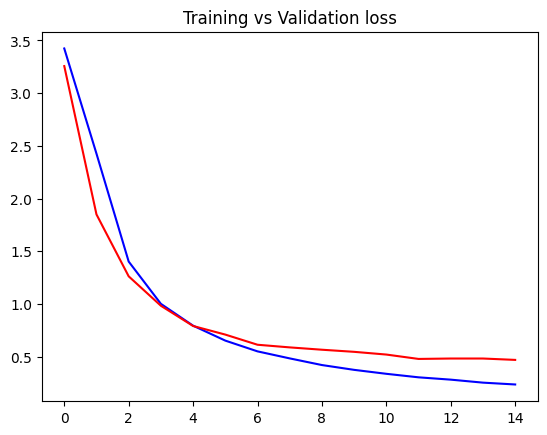

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'validation loss')
plt.title('Training vs Validation loss')

Text(0.5, 1.0, 'Training vs validation accuracy')

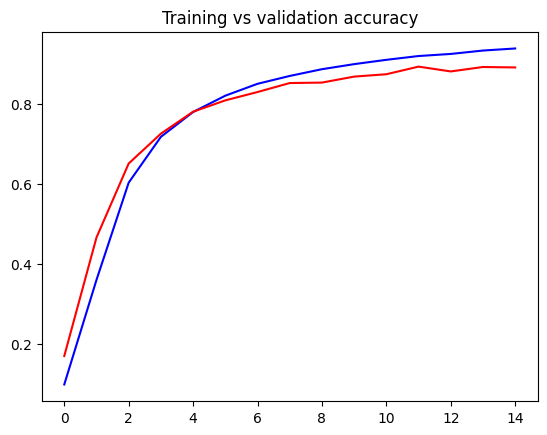

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training vs validation accuracy')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming model is your trained Sequential model
predicted_probabilities = model.predict(x_test_norm)
predicted_classes = predicted_probabilities.argmax(axis=-1)

y_true = y_test
print(classification_report(y_true, predicted_classes))


395/395 [==============================] - 3s 6ms/step
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        60
           1       0.86      0.92      0.89       720
           2       0.92      0.94      0.93       750
           3       0.78      0.94      0.85       450
           4       0.91      0.89      0.90       660
           5       0.87      0.84      0.85       630
           6       1.00      0.81      0.89       150
           7       0.98      0.68      0.80       450
           8       0.75      0.94      0.84       450
           9       0.88      0.99      0.93       480
          10       0.90      0.97      0.93       660
          11       0.82      0.90      0.86       420
          12       0.97      0.95      0.96       690
          13       0.98      0.98      0.98       720
          14       0.78      0.96      0.86       270
          15       0.94      0.97      0.95       210
          16       0.97   

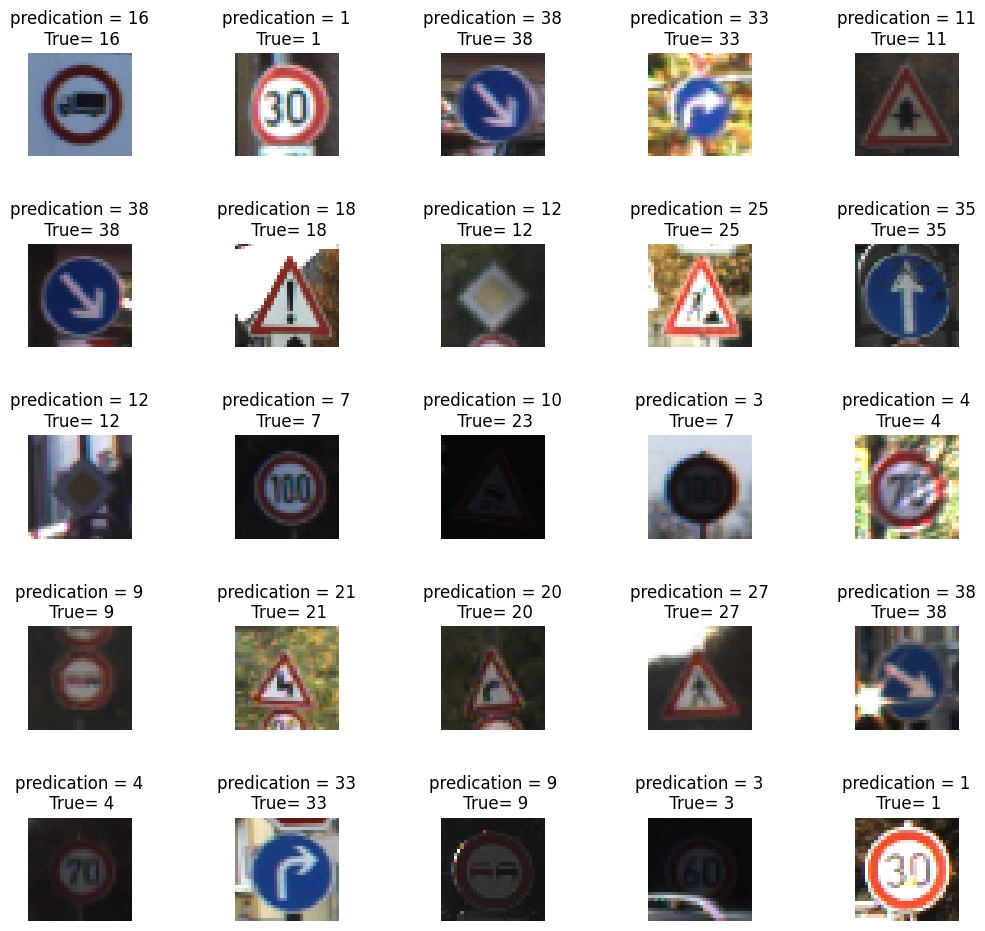

In [ ]:
l = 5
w = 5

fig, axes = plt.subplots(l,w, figsize= (12,12))
axes = axes.ravel()

for i in np.arange(0, l*w):
  axes[i].imshow(x_test[i])
  axes[i].set_title('predication = {}\n True= {}'.format(predicted_classes[i], y_true[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)